# MSA8600: Individual Assignment 2

**Objective** 
This assignment aims to familiarize students with Convolutional Neural Networks (CNNs) with the `keras` library, and image processing using the `OpenCV` library. It has `25` points.

**Instructions** 
Please complete the partial code provided and experiment with different CNN architectures and hyperparameters to achieve the desired results.

**Submission** 
After completion, download the notebook from the `File/Download/Download .ipynp` menu, attach it to the assignment on iCollege, and submit it.

## Problem Statement

1. Use the OpenCV library to preprocess and visualize images.
2. Create a CNN model to classify handwritten digits from the popular MNIST dataset. 
3. Train the model with the training set, and show its accuracy on the test set.
4. Modify the architecture and hyper-parameter to achieve better accuracy.
5. Report on the results of step 4 by writing a short report.

### Step 1: data prepreation and visualization (4 points)

11490434/11490434 [==============================] - 5s 0us/step


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


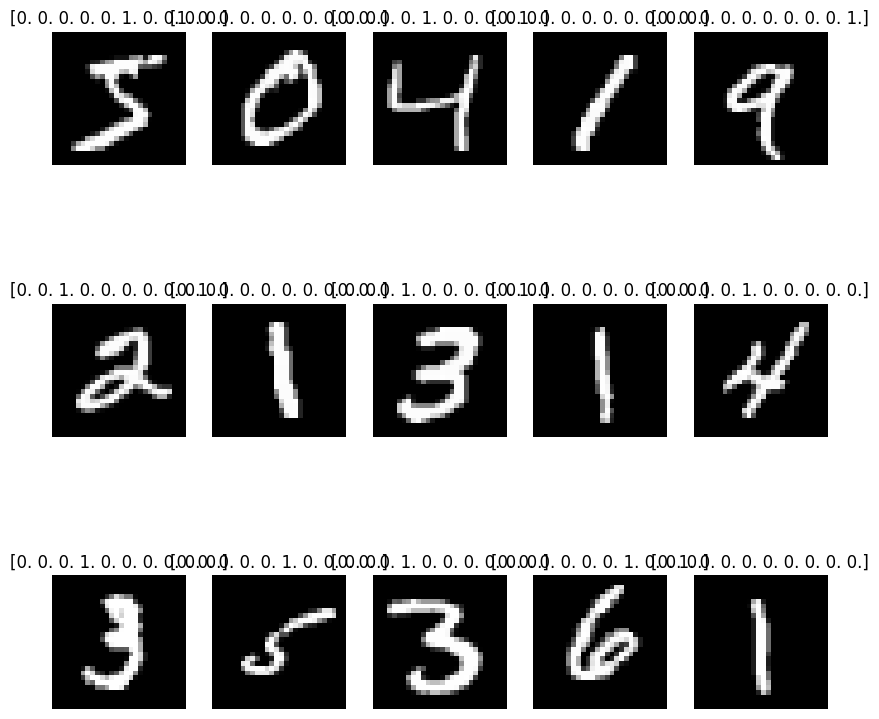

In [3]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import cv2

mnist = tf.keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Splits mnist dataset from keras.datasets into training and testing sets

# TODO: Normalize the pixel values in the dataset
# Hint: Divide the pixel values by 255.0
datagen = ImageDataGenerator(rescale=1.0/255.0)
x_train_normalized = datagen.flow(x_train.reshape((-1, 28, 28, 1)))
x_test_normalized = datagen.flow(x_test.reshape((-1, 28, 28, 1)))

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split the dataset into training and testing sets
x_train, x_test = x_train / 255.0, x_test / 255.0

#https://www.geeksforgeeks.org/how-to-normalize-center-and-standardize-image-pixels-in-keras/#

# Visualize and preprocess images using OpenCV
# Create a window to display the images
def visualize_images(images, labels):
    fig = plt.figure(figsize=(10, 10))

    for i in range(15):
        img = images[i]
        label = labels[i]

        plt.subplot(3, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')

    plt.show()

visualize_images(x_train, y_train)

#https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv/


### Step 2: create a CNN model (6 points)

In [4]:
def create_cnn_model():
    model = tf.keras.Sequential([
        # TODO: Add a 2D convolutional layer
        # Hint: Use a 3x3 kernel and the 'relu' activation function
        Conv2D(64, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        # TODO: Add a max pooling layer
        # Hint: Use a 2x2 pool size
        MaxPooling2D(pool_size=(2, 2)),
        # TODO: Add a Flatten layer
        Flatten(),
        # TODO: Add a dense layer with 128 units and the 'relu' activation function
        Dense(128, activation="relu"),
        # TODO: Add the output layer with 10 units and the 'softmax' activation function
        Dense(10, activation="softmax")
    ])
    return model


model = create_cnn_model()


2023-04-10 20:00:13.609221: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 3: train and evaluate the model (5 points)

In [5]:
# TODO: Compile the model
# Hint: Use the 'adam' optimizer, 'sparse_categorical_crossentropy' loss function, and 'accuracy' metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# TODO: Train the model on the training set
# Hint: Use 4 or 5 epochs and a batch size of 4, 8, or 16
batch_size = 8
epochs = 4
model.fit(x_train.reshape((-1, 28, 28, 1)), y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

    # {1, 2, 4, 8, 16} - slow 
    # { [32, 64],[ 128, 256] } - Good starters
    # [32, 64] - CPU
    # [128, 256] - GPU for more boost

# TODO: Evaluate the model on the test set and print the results
results = model.evaluate(x_test.reshape((-1, 28, 28, 1)), y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

#https://keras.io/api/metrics/

Epoch 1/4
6750/6750 [==============================] - 74s 11ms/step - loss: 0.1402 - accuracy: 0.9566 - val_loss: 0.0576 - val_accuracy: 0.9842
Epoch 2/4
6750/6750 [==============================] - 50s 7ms/step - loss: 0.0545 - accuracy: 0.9830 - val_loss: 0.0422 - val_accuracy: 0.9887
Epoch 3/4
6750/6750 [==============================] - 57s 8ms/step - loss: 0.0360 - accuracy: 0.9891 - val_loss: 0.0427 - val_accuracy: 0.9877
Epoch 4/4
313/313 [==============================] - 2s 4ms/step - loss: 0.0385 - accuracy: 0.9879
Test loss: 0.03849831968545914
Test accuracy: 0.9879000186920166


### Step 4: experiment with different hyperparameters or CNN architectures (5 points)

Try different hyperparameters to improve the performance of the model.

> NOTE: Hyperparameters control the learning process of the CNN model. 

In this assignment, you can explore hyperparameters such as:
- **Kernel size in the convolutional layer:** The filter size that is applied to the input data. Common choices are `3x3`, `5x5`, and `7x7`.

- **Number of filters in the convolutional layer**: The number of filters applied to the input data in the convolutional layer. This determines the number of feature maps generated in the layer.

- **Pool size in the max pooling layer:** The size of the window used for max pooling, typically 2x2 or 3x3.

- **Number of units in the dense layer:** The number of neurons in the dense (fully connected) layer. Common choices are 64, 128, 256, and 512.

- **Activation functions:** The type of activation functions used in the layers, such as ReLU, Leaky ReLU, or sigmoid.


- **Learning rate:** The step size used by the optimizer during weight updates. A smaller learning rate makes the model learn more slowly, while a larger learning rate might cause the model to overshoot the optimal weights.

- **Batch size:** The number of training samples used for each weight update during training. Smaller batch sizes can result in more noise during weight updates, while larger batch sizes can provide more stable updates but may require more memory.

- **Number of training epochs:** The number of times the model iterates over the entire training dataset. Too few epochs may result in underfitting, while too many epochs can lead to overfitting.

In [15]:
#Kernel size in the convolutional layer: 5x5
def create_cnn_model():
    model = tf.keras.Sequential([
        # TODO: Add a 2D convolutional layer
        # Hint: Use a 5x5 kernel and the 'relu' activation function
        Conv2D(64, (5, 5), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        # TODO: Add a max pooling layer
        # Hint: Use a 2x2 pool size
        MaxPooling2D(pool_size=(2, 2)),
        # TODO: Add a Flatten layer
        Flatten(),
        # TODO: Add a dense layer with 128 units and the 'relu' activation function
        Dense(128, activation="relu"),
        # TODO: Add the output layer with 10 units and the 'softmax' activation function
        Dense(10, activation="softmax")
    ])
    return model


model = create_cnn_model()

# TODO: Compile the model
# Hint: Use the 'adam' optimizer, 'sparse_categorical_crossentropy' loss function, and 'accuracy' metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# TODO: Train the model on the training set
# Hint: Use 4 or 5 epochs and a batch size of 4, 8, or 16
batch_size = 16
epochs = 4
model.fit(x_train.reshape((-1, 28, 28, 1)), y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

    # {1, 2, 4, 8, 16} - slow 
    # { [32, 64],[ 128, 256] } - Good starters
    # [32, 64] - CPU
    # [128, 256] - GPU for more boost

# TODO: Evaluate the model on the test set and print the results
results = model.evaluate(x_test.reshape((-1, 28, 28, 1)), y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

#https://iamaaditya.github.io/2016/03/one-by-one-convolution/

Epoch 1/4
3375/3375 [==============================] - 94s 28ms/step - loss: 0.1271 - accuracy: 0.9610 - val_loss: 0.0611 - val_accuracy: 0.9807
Epoch 2/4
3375/3375 [==============================] - 91s 27ms/step - loss: 0.0479 - accuracy: 0.9853 - val_loss: 0.0470 - val_accuracy: 0.9862
Epoch 3/4
3375/3375 [==============================] - 88s 26ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0403 - val_accuracy: 0.9893
Epoch 4/4
313/313 [==============================] - 4s 11ms/step - loss: 0.0325 - accuracy: 0.9890
Test loss: 0.03247974440455437
Test accuracy: 0.9890000224113464


In [17]:
#Kernel size in the convolutional layer: 5x5
#Number of filters in the convolutional layer: inc to 512
#Pool size in the max pooling layer: 2x2 

def create_cnn_model():
    model = tf.keras.Sequential([
        # TODO: Add a 2D convolutional layer
        # Hint: Use a 5x5 kernel and the 'relu' activation function
        Conv2D(512, (5, 5), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        # TODO: Add a max pooling layer
        # Hint: Use a 2x2 pool size
        MaxPooling2D(pool_size=(2, 2)),
        # TODO: Add a Flatten layer
        Flatten(),
        # TODO: Add a dense layer with 128 units and the 'relu' activation function
        Dense(128, activation="relu"),
        # TODO: Add the output layer with 10 units and the 'softmax' activation function
        Dense(10, activation="softmax")
    ])
    return model


model = create_cnn_model()

# TODO: Compile the model
# Hint: Use the 'adam' optimizer, 'sparse_categorical_crossentropy' loss function, and 'accuracy' metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# TODO: Train the model on the training set
# Hint: Use 4 or 5 epochs and a batch size of 4, 8, or 16
batch_size = 16
epochs = 4
model.fit(x_train.reshape((-1, 28, 28, 1)), y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

    # {1, 2, 4, 8, 16} - slow 
    # { [32, 64],[ 128, 256] } - Good starters
    # [32, 64] - CPU
    # [128, 256] - GPU for more boost

# TODO: Evaluate the model on the test set and print the results
results = model.evaluate(x_test.reshape((-1, 28, 28, 1)), y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

#512 inc time to wait / same accuracy from previous


Epoch 1/4
3375/3375 [==============================] - 249s 73ms/step - loss: 0.1077 - accuracy: 0.9671 - val_loss: 0.0561 - val_accuracy: 0.9843
Epoch 2/4
3375/3375 [==============================] - 233s 69ms/step - loss: 0.0417 - accuracy: 0.9870 - val_loss: 0.0407 - val_accuracy: 0.9887
Epoch 3/4
3375/3375 [==============================] - 307s 91ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.0300 - val_accuracy: 0.9915
Epoch 4/4
313/313 [==============================] - 12s 38ms/step - loss: 0.0274 - accuracy: 0.9911
Test loss: 0.02743465267121792
Test accuracy: 0.991100013256073


#Kernel size in the convolutional layer: 5x5
#Number of filters in the convolutional layer: inc to 512
#Pool size in the max pooling layer: 2x2 

This is one took the most out of all the CNN models due to increase of the CV layer to 512 but had a less loss.

In [6]:
#Kernel size in the convolutional layer: 5x5
#Number of filters in the convolutional layer: inc to 512
#Pool size in the max pooling layer: 2x2 
#Number of units in the dense layer: dec 64


def create_cnn_model():
    model = tf.keras.Sequential([
        # TODO: Add a 2D convolutional layer
        # Hint: Use a 5x5 kernel and the 'relu' activation function
        Conv2D(512, (5, 5), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        # TODO: Add a max pooling layer
        # Hint: Use a 2x2 pool size
        MaxPooling2D(pool_size=(2, 2)),
        # TODO: Add a Flatten layer
        Flatten(),
        # TODO: Add a dense layer with 128 units and the 'relu' activation function
        Dense(64, activation="relu"),
        # TODO: Add the output layer with 10 units and the 'softmax' activation function
        Dense(10, activation="softmax")
    ])
    return model


model = create_cnn_model()

# TODO: Compile the model
# Hint: Use the 'adam' optimizer, 'sparse_categorical_crossentropy' loss function, and 'accuracy' metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# TODO: Train the model on the training set
# Hint: Use 4 or 5 epochs and a batch size of 4, 8, or 16
batch_size = 16
epochs = 4
model.fit(x_train.reshape((-1, 28, 28, 1)), y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

    # {1, 2, 4, 8, 16} - slow 
    # { [32, 64],[ 128, 256] } - Good starters
    # [32, 64] - CPU
    # [128, 256] - GPU for more boost

# TODO: Evaluate the model on the test set and print the results
results = model.evaluate(x_test.reshape((-1, 28, 28, 1)), y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

#results seemed to be lowered

Epoch 1/4
3375/3375 [==============================] - 193s 57ms/step - loss: 0.1110 - accuracy: 0.9661 - val_loss: 0.0471 - val_accuracy: 0.9862
Epoch 2/4
3375/3375 [==============================] - 185s 55ms/step - loss: 0.0435 - accuracy: 0.9861 - val_loss: 0.0382 - val_accuracy: 0.9895
Epoch 3/4
3375/3375 [==============================] - 179s 53ms/step - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.0494 - val_accuracy: 0.9865
Epoch 4/4
313/313 [==============================] - 9s 29ms/step - loss: 0.0450 - accuracy: 0.9862
Test loss: 0.04504884406924248
Test accuracy: 0.9861999750137329


#Kernel size in the convolutional layer: 5x5
#Number of filters in the convolutional layer: inc to 512
#Pool size in the max pooling layer: 2x2 
#Number of units in the dense layer: dec 64

results seemed to be lowered with a more loss of 0.045

In [13]:
#Kernel size in the convolutional layer: 5x5
#Number of filters in the convolutional layer: inc to 512
#Pool size in the max pooling layer: 2x2 
#Number of units in the dense layer: dec 64
#Activation functions: sigmoid



def create_cnn_model():
    model = tf.keras.Sequential([
        Conv2D(512, (5, 5), padding="same", activation="sigmoid"),
        MaxPooling2D(pool_size=(2, 2)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation="sigmoid"),
        Dense(10, activation="softmax")
    ])
    return model


model = create_cnn_model()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


batch_size = 16
epochs = 4
model.fit(x_train.reshape((-1, 28, 28, 1)), y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

    # {1, 2, 4, 8, 16} - slow 
    # { [32, 64],[ 128, 256] } - Good starters
    # [32, 64] - CPU
    # [128, 256] - GPU for more boost

results = model.evaluate(x_test.reshape((-1, 28, 28, 1)), y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

Epoch 1/4
3375/3375 [==============================] - 243s 71ms/step - loss: 2.3099 - accuracy: 0.1069 - val_loss: 2.3036 - val_accuracy: 0.1113
Epoch 2/4
3375/3375 [==============================] - 259s 77ms/step - loss: 2.3049 - accuracy: 0.1060 - val_loss: 2.3081 - val_accuracy: 0.1050
Epoch 3/4
3375/3375 [==============================] - 235s 70ms/step - loss: 2.3051 - accuracy: 0.1068 - val_loss: 2.3090 - val_accuracy: 0.1050
Epoch 4/4
313/313 [==============================] - 10s 31ms/step - loss: 2.3036 - accuracy: 0.1135
Test loss: 2.303586959838867
Test accuracy: 0.11349999904632568


#Kernel size in the convolutional layer: 5x5
#Number of filters in the convolutional layer: inc to 512
#Pool size in the max pooling layer: 2x2 
#Number of units in the dense layer: dec 64
#Activation functions: sigmoid

The results were severly lowered with a test loss of 2.3 and an accuracy of 0.11 which is significantly lower than using relu activation function.

In [14]:
#Kernel size in the convolutional layer: 5x5
#Number of filters in the convolutional layer: change back to 64
#Pool size in the max pooling layer: 2x2 
#Number of units in the dense layer: dec 64
#Activation functions: relu, change back to the original
#Learning rate: same

def create_cnn_model():
    model = tf.keras.Sequential([
        Conv2D(64, (5, 5), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax")
    ])
    return model


model = create_cnn_model()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


batch_size = 16
epochs = 4
model.fit(x_train.reshape((-1, 28, 28, 1)), y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

    # {1, 2, 4, 8, 16} - slow 
    # { [32, 64],[ 128, 256] } - Good starters
    # [32, 64] - CPU
    # [128, 256] - GPU for more boost

results = model.evaluate(x_test.reshape((-1, 28, 28, 1)), y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

Epoch 1/4
3375/3375 [==============================] - 45s 13ms/step - loss: 0.1456 - accuracy: 0.9555 - val_loss: 0.0562 - val_accuracy: 0.9847
Epoch 2/4
3375/3375 [==============================] - 39s 11ms/step - loss: 0.0534 - accuracy: 0.9834 - val_loss: 0.0495 - val_accuracy: 0.9852
Epoch 3/4
3375/3375 [==============================] - 39s 12ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.0413 - val_accuracy: 0.9872
Epoch 4/4
313/313 [==============================] - 3s 8ms/step - loss: 0.0462 - accuracy: 0.9851
Test loss: 0.046164512634277344
Test accuracy: 0.9850999712944031


#Kernel size in the convolutional layer: 5x5
#Number of filters in the convolutional layer: change back to 64
#Pool size in the max pooling layer: 2x2 
#Number of units in the dense layer: dec 64
#Activation functions: relu, change back to the original
#Learning rate: same

I changed the activation function back to relu since sigmoid takes longers to process, i left the learning rate the same because I believe it runs as a steady process.

In [15]:
#Kernel size in the convolutional layer: 5x5
#Number of filters in the convolutional layer: 64
#Pool size in the max pooling layer: 2x2 
#Number of units in the dense layer: dec 64
#Activation functions: relu
#Learning rate: same
#Batch size: 8 



def create_cnn_model():
    model = tf.keras.Sequential([
        Conv2D(64, (5, 5), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax")
    ])
    return model


model = create_cnn_model()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


batch_size = 8
epochs = 4
model.fit(x_train.reshape((-1, 28, 28, 1)), y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

    # {1, 2, 4, 8, 16} - slow 
    # { [32, 64],[ 128, 256] } - Good starters
    # [32, 64] - CPU
    # [128, 256] - GPU for more boost

results = model.evaluate(x_test.reshape((-1, 28, 28, 1)), y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

Epoch 1/4
6750/6750 [==============================] - 53s 8ms/step - loss: 0.1271 - accuracy: 0.9610 - val_loss: 0.0575 - val_accuracy: 0.9832
Epoch 2/4
6750/6750 [==============================] - 51s 8ms/step - loss: 0.0493 - accuracy: 0.9849 - val_loss: 0.0404 - val_accuracy: 0.9880
Epoch 3/4
6750/6750 [==============================] - 51s 7ms/step - loss: 0.0354 - accuracy: 0.9886 - val_loss: 0.0376 - val_accuracy: 0.9905
Epoch 4/4
313/313 [==============================] - 2s 7ms/step - loss: 0.0335 - accuracy: 0.9892
Test loss: 0.033542387187480927
Test accuracy: 0.9891999959945679


#Kernel size in the convolutional layer: 5x5
#Number of filters in the convolutional layer: 64
#Pool size in the max pooling layer: 2x2 
#Number of units in the dense layer: dec 64
#Activation functions: relu
#Learning rate: same
#Batch size: 8 

Changing the batch size decrease time from the orginal which means batch size will be increased for lower time and accruacy and loss is similar.

In [16]:
#Kernel size in the convolutional layer: 5x5
#Number of filters in the convolutional layer: 64
#Pool size in the max pooling layer: 2x2 
#Number of units in the dense layer: dec 64
#Activation functions: relu
#Learning rate: same
#Batch size: 8 
#Number of training epochs: 5

def create_cnn_model():
    model = tf.keras.Sequential([
        Conv2D(64, (5, 5), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax")
    ])
    return model


model = create_cnn_model()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


batch_size = 8
epochs = 5
model.fit(x_train.reshape((-1, 28, 28, 1)), y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

    # {1, 2, 4, 8, 16} - slow 
    # { [32, 64],[ 128, 256] } - Good starters
    # [32, 64] - CPU
    # [128, 256] - GPU for more boost

results = model.evaluate(x_test.reshape((-1, 28, 28, 1)), y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

Epoch 1/5
6750/6750 [==============================] - 53s 8ms/step - loss: 0.1356 - accuracy: 0.9578 - val_loss: 0.0647 - val_accuracy: 0.9803
Epoch 2/5
6750/6750 [==============================] - 51s 8ms/step - loss: 0.0503 - accuracy: 0.9839 - val_loss: 0.0559 - val_accuracy: 0.9838
Epoch 3/5
6750/6750 [==============================] - 48s 7ms/step - loss: 0.0346 - accuracy: 0.9894 - val_loss: 0.0447 - val_accuracy: 0.9867
Epoch 4/5
6750/6750 [==============================] - 193s 29ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 0.0427 - val_accuracy: 0.9868
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0448 - accuracy: 0.9879
Test loss: 0.04475928843021393
Test accuracy: 0.9879000186920166


#Kernel size in the convolutional layer: 5x5
#Number of filters in the convolutional layer: 64
#Pool size in the max pooling layer: 2x2 
#Number of units in the dense layer: dec 64
#Activation functions: relu
#Learning rate: same
#Batch size: 8 
#Number of training epochs: 5

Increase the epoch increase the time for processing training with a slightly larger loss and lower accuracy. 

### Step 5: report (5 points)

Discuss the hyperparameters explored, along with the resulting performance metrics. What values of hyperparameters make the model underperform and what values make it more accurate? Did you encounter errors?

wrote it under each cell *Write your reporting by editing this text cell*